# Typical NLP-heavy problems

* *Classification*: Classifying documents into particular categories (giving labels).
* *Regression*: Predict numerical values
* *Clustering*: Separating documents into non- overlapping subsets.
* *Ranking*: For a given input, rank documents according to some metric. 
* *Association rule mining*: Infer likely associations patterns in data.
* *Structured output*: Bounding boxes, parse trees, etc.
* *Sequence-to-sequence*: For a given input/source text, generate output annotations or another text.

To address many of the challenges above, several important things has to be clarified beforehand:

1. Set the research/exploration goal (e.g., how heavy will be the earthquake on a given day).
2. Make a hypothesis ( e.g., strength of the earthquake is an informative signal).
3. Collect the data (e.g., collect historical strength of the quakes on eachday).
4. Test the hypothesis (e.g., train a model using the data)
5. Analyze the results (e.g., are results better than existing systems).
6. Reach a conclusion (e.g., the model should be used or not because of A, B, C).
7. Refine hypothesis and repeat. (e.g., time of the year could be a useful signal).

Below is the table of the approaches that can be applied to the problems/applications above.

| Type                   | Input   | Clarifications|
|------------------------|---------|---------------|
|   Rule-based           |Explicit linguistic patterns, <br>lexicons, etc.| Such an approach always have predefined behaviour and usually can't generalize usually. |
|   Supervised           | Training examples: typically <br>tuples of the form <br>(features, label) | Here input features are usually some vectorized, transformed, normalized input representation.|
|   Semi-supervised or <br> Pseudo-relevance <br>feedback   | Same as in supervised base, <br>but also results of the prediction <br>(e.g. with greatest confidence) <br>are used as input pairs.   | Once we trained the system on the input (feature, label), we label unknown examples <br>with the model. If the confidence of the label is high (on that unseen example), <br>we add those examples to the input set and retrain the model. |
|   Distant supervision  | Same as for supervised learning, <br>but (feature, label) pairs does not <br> come from the annotation, but from <br>some heuristic-based annotation.   | Rather than annotating thousands of examples (documents, sentences, words, etc.), <br>we take a few examples of the class and try to generalize and match those <br>in the domain-specific corpus. Such systems first generate or extract examples that are <br> very similar or slight modifications of the labelled input examples. For example, if you need to <br> find all the sentences about Obama's marriage, you would search for all sentences that match <br> Michelle and Barack Obama. Furthermore, those examples could be used to find any sentence <br> about a marriage. Another example could be for a given list of movies, match all the sentences that have <br> movie names. Clearly, such heuristics result in noisy input sets.|
|   Unsupervised         | Unlabeled features   | The system is expected to find some dependencies and patterns without clearly stating <br>which patterns we are looking for. E.g., clustering of documents, topics extraction <br>from the documents, etc. |
|   Hybrid               | Varies for method <br>combinations   | Combines several approaches that are mentioned earlier for various purposes. |

# Evaluation Metrics

Depending on the problem you solve or the  data (balanced number of classes or not) different metrics
<br>might be more suitable.

* **Accuracy**
<br>
$ Accuracy = \frac{n_{correct}}{N}$, where $N$ is a total number of example that we were analysing,
<br>$n_{corrent}$ is the number of examples that we have guessed the label.

*a.k.a. Classification*

* **Precision**
<br>
In case of classification, and in particular, if the classes are unbalanced, Precision should be a better measure to check.
<br>
$ Precision = \frac{n_{correct\ class\ prediction}}{n_{class\ predictions}} = \frac{TP}{TP + FP}$,
where $TP, FP, FN, TN$ are explained [here](https://en.wikipedia.org/wiki/False_positives_and_false_negatives).

* **Precision@K**
<br>
Once your task is not simply to classify some examples, but e.g. rank them, a popular metric is P@K.
<br>Here you use K (typically, 1,3,5, 10, etc.) and compute precision for those K results in your ranking.
<br>For example, if you have a query for which you need to find similar documents,
<br>P@K would be computed for the top K documents that are returned for a query as described above for those K elements.

* **Recall**
<br>
Another very important concept in NLP, is Recall - which basically tell us how many of the class examples
<br>or positive examples (maybe documents), our system had managed to extract.
<br>
$ Precision = \frac{n_{correct\ class\ prediction}}{n_{positive\ class\ examples}} = \frac{TP}{TP + FN}$ $

* **F1**
<br>
[F1](https://en.wikipedia.org/wiki/F1_score) is the harmonic mean of the two above metrics.
<br>Usually used to compare different approaches when you are not optimizing for P and R in particular
<br>but rather overall performance.

*a.k.a. Clustering* 

* [**Silhouette coefficient, Modularity, etc**](https://en.wikipedia.org/wiki/Cluster_analysis).
<br>
Once we move from the classification problems, and focus on clustering of the documents, many things can be measured depending
<br>if you have labels or not.
<br>
The case where we do not have labels: 
  * For already proposed clustering of the input, *modularity* would measure how well nodes are assigned to the clusters.
  <br> In particular, we would estimate how our current assignment is different from the assumed random graph.
  * Silhouette coefficient estimates how average distance between objects in the same clusters differs
  <br>from the average distance of those objects to the other clusters.
  * [Davies–Bouldin index](https://en.wikipedia.org/wiki/Davies-Bouldin_index) measures the difference between inter- and intra-cluster similarity.

*a.k.a. Language models*

* **Perplexity**
<br>
Once we consider text generation tasks, where we typically do not have labelled examples, or multiple correct answers
<br>are possible, *perplexity* can be used to evaluate your model. tl;dr - Perplexity estimates how surprised the model
<br>is upon receiving an input, e.g., how the model is surprised that the next word after a current one
<br>"eat" is "me", or "meat" or whatever. Typically, the lower the perplexity the more information about
<br>the input the model has (no surprises). Another interpretation is that we compare our probability
<br>distribution to the fair die.

---

# Clustering, topic modeling

---

In [1]:
#@title Data preparation and preprocessing { display-mode: "form" }
# You can download these data from the following link and store somewhere locally:

csv_file = 'https://www.figure-eight.com/wp-content/uploads/2016/03/socialmedia-disaster-tweets-DFE.csv'

#    Example on how the data cab be loaded here from the local file system. 
#    More options here: https://colab.research.google.com/notebook#fileId=/v2/external/notebooks/io.ipynb&scrollTo=vz-jH8T_Uk2c
#    Downloaded the input csv.

from google.colab import files
uploaded = files.upload()

import pandas as pd
with open('socialmedia-disaster-tweets-DFE.csv',
          mode = 'r',
          encoding = 'ascii',
          errors = 'ignore'
         ) as csvfile:
  disasters_df = pd.read_csv(csvfile, header=0)

#    Golden examples
golden = disasters_df['_unit_state'] == "golden"
golden_positive = disasters_df['choose_one_gold'] == "Relevant"
golden_negative = disasters_df['choose_one_gold'] == "Not Relevant"

#    Annotated examples
finalized = disasters_df['_unit_state'] == "finalized"
confident = disasters_df['choose_one:confidence'] > 0.8
finalized_positive = disasters_df['choose_one'] == "Relevant"
finalized_negative = disasters_df['choose_one'] == "Not Relevant"

clean_confident_entries = disasters_df[
    golden | (finalized & finalized_positive & confident) | 
    (finalized & finalized_negative & confident)]
#    Need to decide on tokenization - most of the time " " is a good guess.

# Imports
# Note: following nltk packages should be downloaded
import nltk
nltk.download('punkt')
from nltk import (
    sent_tokenize as splitter,
    wordpunct_tokenize as tokenizer
)

# Splits a string into sentences and words.
def tokenize(text):
  return [tokenizer(sentence) for sentence in splitter(text)]

# In this exercise we do not care about the sentences (if any),
# so let's flatten the list.
def flatten(nested_list):
  return [item for sublist in nested_list for item in sublist]

def tokenize_flatten_df(row, field):
  return flatten(tokenize(row[field]))

import re

# remove urls
def remove_urls(text):
  return re.sub(r"(https?\://)\S+", "", text)

# remove mentions (@name) completely
def remove_mentions(text):
  return re.sub(r"@[^:| ]+:? ?", "", text)

# remove "RT:", if the tweet contains it.
def remove_rt(text):
  if text.lower().startswith("rt:"):
    return text[3:].strip()
  return text
def remove_urls_mentions_rt_df(row, field):
  return remove_rt(remove_mentions(remove_urls(row[field])))

clean_confident_entries['text_cleaned_from_url_mentions_rt'] = \
    clean_confident_entries.apply(
        lambda row: remove_urls_mentions_rt_df (row, 'text'),
        axis=1)

clean_confident_entries['text_tokenized'] = \
    clean_confident_entries.apply(
        lambda row:
            tokenize_flatten_df (row, 'text_cleaned_from_url_mentions_rt'),
        axis=1)
def replace_hashtags_from_text(text):
  return re.sub(r"#+ ?", "", text)
# remove hashtags
def replace_hashtags_from_list(tokens_list):
  return [token for token in tokens_list if token != "#"]

# remove digits
def remove_digits(tokens_list):
  return [token for token in tokens_list 
                if not re.match(r"[-+]?\d+(\.[0-9]*)?$", token)]

# remove all tokens that contains non alpha numeric, punctuation
def remove_containing_non_alphanum(tokens_list):
  return [token for token in tokens_list if token.isalpha()]
# lowercase everything
def lowercase_list(tokens_list):
  return [token.lower() for token in tokens_list]
from nltk.corpus import stopwords
nltk.download('stopwords')
# remove stopwords
def remove_stopwords(tokens_list):
  return [token for token in tokens_list
                if not token in stopwords.words(u'english')]
# Iterates over the elements of the list with tokens and performs cleanup.
def clean_tokens(row, field):
  return replace_hashtags_from_list(
            remove_digits(
                remove_containing_non_alphanum(
                    lowercase_list(remove_stopwords(row[field])))))

clean_confident_entries['text_tokenized_cleaned'] = \
    clean_confident_entries.apply(
        lambda row:
            clean_tokens (row, 'text_tokenized'),
        axis=1)
nltk.download('wordnet')
porter_stemmer = nltk.PorterStemmer()
lancaster_stemmer = nltk.LancasterStemmer()
snowball_stemmer = nltk.SnowballStemmer(u'english')
lemmatizer = nltk.WordNetLemmatizer()
lemmatizer.stem = lemmatizer.lemmatize
normalizers = [
    ('porter_stemmer', porter_stemmer),
    ('lancaster_stemmer', lancaster_stemmer),
    ('snowball_stemmer', snowball_stemmer),
    ('wordnet_lemmatizer', lemmatizer)
]
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(clean_confident_entries['text_tokenized'][0])
print (tagged)


#@title Document Frequency Helper Functionality
# Compute vector representation for each document in the collection.
# Term frequency
# TFIDF

from collections import defaultdict, Counter
import math

class TermDocumentCounts:
  def __init__(self):
    # Counters of all the words in the corpus
    self.total_word_counts = Counter()
    self.total_number_of_words = 0
    self.term_count_per_document = defaultdict(Counter)
    self.number_of_words_per_document = defaultdict(int)
    self.number_of_document = 0
    self.df = defaultdict(int)
    
  def update(self, document_id, tokens):
    self.number_of_document += 1
    num_tokens = len(tokens)
    self.total_word_counts.update(tokens)
    self.total_number_of_words += num_tokens
    self.term_count_per_document[document_id].update(tokens)
    self.number_of_words_per_document[document_id] += num_tokens
    for token in set(tokens):
      self.df[token] += 1
  
  def most_common_word_in_document(self, document_id, top_n = None):
    return self.term_count_per_document[document_id].most_common(top_n)
  
  def _compute_tfidf_for_word(self, document_id, word):
        tf = self.term_count_per_document[document_id][word]
        idf = math.log(self.number_of_document / self.df[word], 10)
        return tf * idf
  
  # Returns the list of words ranked accoring to TFIDF score.
  def ranked_document_words_tfidf(self, document_id, top_n=None):
        tfidfs = [
            (word, self._compute_tfidf_for_word(document_id, word))
              for word in self.term_count_per_document[document_id].keys()
        ]
        tfidfs.sort(key=lambda x: x[1], reverse=True)
        if not top_n:
            top_n = len(tfidfs)
        return tfidfs[:top_n]
      
  # Returns the list of words ranked accoring to max conditional probability
  # change.
  def ranked_document_words_conditional_probability(self, document_id,
                                                    top_n = None):
    word_posterior = [(word, self.compute_posterios(document_id, word)) \
              for word, count in \
                self.term_count_per_document[document_id].items()]
    word_prior = {word: self.compute_priors(word) for word, _ in word_posterior}
    conditional_probability = sorted(
        [(word, (math.log((probability / word_prior[word]), 2))) \
            for word, probability in word_posterior],
        key=lambda x: x[1],
        reverse=True
    )
    if not top_n:
        top_n = len(conditional_probability)
    return conditional_probability[:top_n]  
      
  # Computes posterior word distribution over given document.
  def compute_posterios(self, document_id, word):
    return self.term_count_per_document[document_id][word] \
              / self.number_of_words_per_document[document_id]
  
  # Computes prior word probability distribution
  def compute_priors(self, word):
    return self.total_word_counts[word] / self.total_number_of_words
   
corpus_counts = TermDocumentCounts()
for document_id, row in clean_confident_entries.iterrows():
  corpus_counts.update(document_id, row['text_tokenized_cleaned'])

Saving socialmedia-disaster-tweets-DFE.csv to socialmedia-disaster-tweets-DFE.csv
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('Just', 'RB'), ('happened', 'VBD'), ('a', 'DT'), ('terrible', 'JJ'), ('car', 'NN'), ('crash', 'NN')]


## [Repetition] Documents representation

Let's finally impose some vectorized representation on our documents so that the machine and math could easily operate over it.

### Document representation as term counts (Bag-Of-Words, or BOW)

In [0]:
#    Now we need to convert our documents to the common representation.
#    You can do it manually, just for fun, or we can already use some libs.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()

corpus = []
for document_id, row in clean_confident_entries.iterrows():
  corpus.append(" ".join(row['text_tokenized_cleaned']))
  
document_term_matrix = vectorizer.fit_transform(corpus).toarray()

In [3]:
document_term_matrix[0]

array([0, 0, 0, ..., 0, 0, 0])

#### Loading embeddings

In [0]:
# !pip install --upgrade gensim
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

#    Note: it might take several minutes. Be patient!
from gensim.scripts.glove2word2vec import glove2word2vec

glove2word2vec(glove_input_file='glove.6B.50d.txt',
               word2vec_output_file="gensim_glove_vectors.txt")
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt")

### Document as mean of its word embeddings

Let's represent each document representation as a mean of its word embeddings.

In [0]:
import numpy as np
document_embeddings = []
for document_id, row in clean_confident_entries.iterrows():
  document = row['text_tokenized_cleaned']
  document_word_embeddings = \
      [model[token] for token in document if token in model]
  if (len(document_word_embeddings) > 0):
    document_embeddings.append(np.mean(document_word_embeddings, axis=0))
  else:
    document_embeddings.append([])

In [10]:
print(document_embeddings[0][0:40])

[ 0.584656   -0.072843    0.3689644  -0.0436628   0.195982    0.12462799
 -0.393536    0.46289802 -0.04390199 -0.2285988  -0.255066   -0.29687202
 -1.066976   -0.045356    1.108968   -0.0226706  -0.2818528   0.36304098
 -0.888292   -0.5358432  -0.1505568   0.59529    -0.1612092   0.13784601
  0.81164896 -1.62962    -0.94111997  0.520214    1.165798   -0.08268801
  2.3495002   0.25701362 -0.139996   -0.18958001  0.21726222  0.024276
  0.42169198 -0.248912    0.38061     0.1664304 ]


# Problem: Find a document that is more similar to a given input text? 

Assume we want to find all the tweets about earthquakes with the expressed reaction similar to an input tweet.

Another good example application is within Question-Answering systems:
<br>We need to paraphrase user query to find the most similar known query with an answer in the database.

## Document Similarity

Let's now see if we can find some documents that will be similar to a given one(s).

### Possible similarity measures

* **Edit distance**

Edit distance measure the weighter number of deletion, insertions, copying, substitutions that needs to be made in order to transform one string into the other.
<br>
In the most basic case, all of those operation have same weight, though, in practice, some of the operations might have a smaller cost.
<br>E.g., you might need to penalize less the substitutions to better consider typos, or you might have other penalties for the numeric/punctuation/etc characters.

<img src="https://www.python-course.eu/images/levenshtein_distance_matrix_explained.png" width="30%">

(c) [Levenstein distance](https://www.python-course.eu/levenshtein_distance.php)

In [0]:
# Computes Levenstein edit distance between two strings.
def edit_distance(text1, text2):
  if len(text1) > len(text2):
    text1, text2 = text2, text1
  distances = range(len(text1) + 1)
  for i2, c2 in enumerate(text2):
    distances_ = [i2+1]
    for i1, c1 in enumerate(text1):
      if c1 == c2:
        distances_.append(distances[i1])
      else:
        distances_.append(1 + min((distances[i1],
                                   distances[i1 + 1],
                                   distances_[-1])))
    distances = distances_
  return distances[-1]

* Euclidian distance

Euclidian distance measures the actual distance between 2 points in the n-dimentional space. Note: euclidian distance is also a $L_2$ norm.

$$ d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2} $$

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Euclidean_distance_3d_2_cropped.png" width="50%">

(c) [Euclidian distance illustration](https://en.wikipedia.org/wiki/Euclidean_distance)

* **Cosine similarity**

Cosine similarity is the measure of similarity between two non-zero vectors
<br>(inner product that actually measures the cosine of the angle between the vectors).

Cosine is basically the  euclidian dot products between two vectors normalized by the vectors' norms.

$$ a \cdot b = \left\lVert a \right\rVert \left\lVert b \right\rVert \cos \theta $$

$$ \cos \theta = \frac{a \cdot b}{\left\lVert a \right\rVert \left\lVert b \right\rVert}$$

In [0]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Computes cosine similarity between two vectors.
# Assumes that vectors are of the same size!
# The function returns the cosine of the angle between two input vectors.
# This is equal to v1*v2 / |v1||v2|.
# 
def vectors_cosine_similarity(vector1, vector2):
  vectors = [vector1, vector2]
  # return np.dot(v1, v2) / (math.sqrt(np.dot(v1, v1)) * math.sqrt(np.dot(v2, v2)))
  return cosine_similarity(vectors)[0][1]
 
#  Returns "1 - cosine similarity" to align better with the notion of distance.
def vectors_cosine_aka_distance(vector1, vector2):
  return 1 - vectors_cosine_similarity(vector1, vector2)

* [**Word's Movers Distance**](http://proceedings.mlr.press/v37/kusnerb15.pdf)


Word's movers distance, intuitively, is an edit distance between two tokenized strings in the semantic space. In practice, in order to compute
<br>such distance one should solve the minimum "travelling distance" between two strings, where the distance between words of two sentences
<br>is how words of one string is similar to the words in the other string, and each word is something like a package with multiple items of
<br>the same kind that needs to be transfered to the words from the other string.

<img src="https://vene.ro/images/wmd-obama.png" width="80%">

Typically, to measure the distance between words, WMD uses euclidian distance (this metric might require normalization of the word embeddings),
<br>though cosine similarity might be also used.

WMD [tutorial](https://markroxor.github.io/gensim/static/notebooks/WMD_tutorial.html) if you need some more explanations and examples.


In [0]:
#     Some more advanced similarity measures - Word's Movers Distance.
# Accepts a two documents and a similarity metric that is used to compare
# similarity of words. Each document represented as a list of vectors, where
# vectors are the corresponding word embeddings of the document words.
def words_movers_distance(first_w2v,
                          second_w2v,
                          word_dist_metric=vectors_cosine_similarity):
    from scipy.optimize import linprog
    costs = [word_dist_metric(first_w2v[first], second_w2v[second]) \
                for first in range(len(first_w2v))
                    for second in range(len(second_w2v))]
    first_word_weight = 1.0 / len(first_w2v)
    second_word_weight = 1.0 / len(second_w2v)
    eq_restrictions = []
    for first in range(len(first_w2v)):
        eq_restrictions += [[0.0] * (first * len(second_w2v)) +
                            [1.0] * len(second_w2v) +
                            [0.0] *  ((len(first_w2v) - first - 1)
                                      * len(second_w2v))]
    for second in range(len(second_w2v)):
        vec = [0.0] * (len(first_w2v) * len(second_w2v))
        for first in range(len(first_w2v)):
            vec[first * len(second_w2v) + second] = first_word_weight
        eq_restrictions += [vec]
    eq_restrictions = np.matrix(eq_restrictions)
    eq_vals = [1] * len(first_w2v) + [second_word_weight] * len(second_w2v)
    lims = [(0, 1.0)] * (len(first_w2v) * len(second_w2v))
    res = linprog(costs,
                  A_eq=eq_restrictions,
                  b_eq=eq_vals,
                  bounds=lims,
                  options={"disp": False})
    distance = sum(res.x * costs)
    return distance / float(len(first_w2v))

### Similar documents to a given one

For a given document, let's compute its distance/similarity to all other documents in the corpus.

#### Cosine similarity in a Bag-Of-Words representation

Now let's find the most similar documents for a given document using one of the
representations and similarity function.

In [0]:
#    Find most similar document to a given document.
# For simplicity let's use id as an order in the document_term_matrix
# (!= index).
document_id = 0

# Compute for a given documents distances to all other documents in the
# collection.
given_document_term_frequency = list(document_term_matrix[document_id])
document_distances = defaultdict(lambda : 5.0)
for i, (current_index, row) in enumerate(clean_confident_entries.iterrows()):
  if i == document_id:
    continue
  document_distances[current_index] = vectors_cosine_aka_distance(
      given_document_term_frequency,
      document_term_matrix[i])

In [15]:
print ("INPUT TEXT:", clean_confident_entries['text_tokenized_cleaned'][document_id])
print ("Most similar documents according to"
       "the selected similarity measure and vectorizer.")
for index, distance in sorted(document_distances.items(),
                              key=lambda x:x[1])[:10]:
  if index != document_id:
    print (distance, clean_confident_entries['text_tokenized_cleaned'][index])

INPUT TEXT: ['just', 'happened', 'terrible', 'car', 'crash']
Most similar documents according tothe selected similarity measure and vectorizer.
0.5527864045000421 ['crash']
0.5527864045000421 ['i', 'crash']
0.6348516283298893 ['car', 'vs', 'motorcycle', 'crash', 'fairport', 'nine']
0.6619382981085934 ['damage', 'school', 'bus', 'multi', 'car', 'crash', 'breaking']
0.6619382981085934 ['just', 'saw', 'car', 'i', 'fully', 'engulfed', 'flames', 'hahah']
0.6837722339831621 ['crash', 'burn']
0.7 ['pilot', 'dies', 'in', 'plane', 'crash', 'at', 'car', 'festival', 'via', 'crash', 'aircraft', 'airplane', 'pilot', 'death', 'accident', 'carfest']
0.7 ['man', 'killed', 'crash', 'barrington', 'hills', 'a', 'hoffman', 'estates', 'man', 'killed', 'single', 'car', 'crash', 'wednesday', 'afte']
0.7 ['transportation', 'panel', 'showing', 'video', 'pileup', 'wheelers', 'snowstorm', 'wy', 'crash', 'crash', 'crash', 'make', 'stop', 'amssummer']
0.7018576030000281 ['my', 'phone', 'looks', 'like', 'car', 'shi

#### Cosine similarity in a vector space representation (mean embeddings)

In [0]:
#    Find most similar document to a given index
document_id = 0

# Compute for a given documents distances to all other documents in the
# collection.
given_document_embeddings = document_embeddings[document_id].tolist()
embedded_document_distances = defaultdict(lambda : 5.0)
for i, (current_index, row) in enumerate(clean_confident_entries.iterrows()):
  if i == document_id:
    continue
  to_compare_embedding = document_embeddings[i]
  if (len(to_compare_embedding) > 0):
    embedded_document_distances[current_index] = vectors_cosine_aka_distance(
        given_document_embeddings, to_compare_embedding.tolist())

Let's print the resulting top most similar documents.

In [17]:
print ("INPUT TEXT:", clean_confident_entries['text_tokenized_cleaned'][document_id])
print ("Most similar documents using embedded document representation for:")
for index, distance in sorted(embedded_document_distances.items(),
                              key=lambda x:x[1])[:10]:
  if index != document_id:
    print (distance, clean_confident_entries['text_tokenized_cleaned'][index])

INPUT TEXT: ['just', 'happened', 'terrible', 'car', 'crash']
Most similar documents using embedded document representation for:
0.04766097626681187 ['breaking', 'deadly', 'motorcycle', 'car', 'accident', 'happened', 'hagerstown', 'today', 'i', 'details', 'whag']
0.049367265551323425 ['i', 'crash']
0.05660608922986221 ['that', 'might', 'killed', 'airplane', 'accident', 'night', 'car', 'wreck', 'politics', 'best']
0.07561898016639568 ['my', 'phone', 'looks', 'like', 'car', 'ship', 'airplane', 'accident', 'terrible']
0.08862421908658924 ['heard', 'days', 'ago', 'driving', 'near', 'crashed', 'car', 'laughing', 'much']
0.09208775582096573 ['horrible', 'accident', 'man', 'died', 'in', 'wings', 'airplane']
0.09208775582096573 ['horrible', 'accident', 'man', 'died', 'in', 'wings', 'airplane', 'watchthevideo']
0.09208775582096573 ['horrible', 'accident', 'man', 'died', 'in', 'wings', 'airplane']
0.09208775582096573 ['horrible', 'accident', 'man', 'died', 'in', 'wings', 'airplane']
0.09208775582

#### [EXERCISE :) ] Word's Mover Distance (WMD) and pretrained word embeddings

Now let's use already loaded pretrained embedding and use in-place gensim WMD to compute similarity between two vectors.

In [18]:
!pip install --upgrade pyemd
from pyemd import emd

Requirement already up-to-date: pyemd in /usr/local/lib/python3.6/dist-packages (0.5.1)


In [19]:
w_m_distance = model.wmdistance(["I", "go", "to", "school"], ["We", "run", "to", "university"])

from gensim.similarities import WmdSimilarity
w_m_distance

2.3954870348370316

Now let's see how we could find most similar documents for a given corpus by a provided query (also preprocessed).

##### Solution sketch

# Topic Modeling and Clustering

When we face the lack of labels, we can explore some other unsupervised techniques to find similar documents and extract patterns
<br>from the documents' corpus, e.g. clustering or topic modeling.

## Clustering

Clustering is used when we want to find the structure in the unlabeled data. E.g. discover some patterns in demographics to provide
<br>a more siutable service for the consumers; find outliers in the dataset, etc.

If you need to group your documents into known or unknown number of groups - you probably need to apply some document clustering.

Why you might need to do it?
* Reduce the input size
* Discover which groups of similar documents you have in the data
* How those groups are represented in your corpus
* etc.




### <font color='gray'> Common clustering techniques </font>



See [here](http://nbviewer.jupyter.org/github/lmcinnes/hdbscan/blob/master/notebooks/Comparing%20Clustering%20Algorithms.ipynb) for overview of common techniques.

* **Greedy methods**
<br>
In a nutshell, the algorithm scans the document collection once and assign each document to a new cluster
<br>if there are no other existing clusters that are similar to the current document.
<br>
*Pros*: Scalable;
<br>
*Cons*: Not reliable as it depends on the order;

* **K-Nearest Neighbors**
<br>
Each new data point is classified by a majority vote of its (K) neighbors, with the object being assigned to the class most common
<br>among its k nearest neighbors. 
<br>
*Pros*: Usually is high on precision; incencitive to outliers; simple;
<br>
*Cons*: Might be very slow for some similarity measures; Might be unstable to hte number of K neighbors.

* **K-Means**
<br>
K-means partitioning is easy to understand, fast and available method which minimizes intra-partition distances.
<br>If you know number of clusters (for some reasons), just run the algorithms, if not, run the algorithms with multiple number of clusters
<br>as a parameter and see the change if intra-,inter-cluster distances.
<br>
In a nutshell, the method have several iteration of the same form, first choose $k$ centroid vectors, (\*) add all other points to
<br>the centroids that are the closest to them. Then, for each new cluster recompute a centroid (e.g., mean of all vectors), and start over form (\*).
<br>
*Pros*: Performance;
<br>
*Cons*: Need to have an intuition on the number of clusters; all points will be assigned to the clusters (even if not all should be there);

* **Affinity Propagation**
<br>
This method uses graph-based approach where each point 'votes' on their preferred 'representative'.
<br>
The result is a set of clusters of representatives from which we derive clusters and assign each point to the cluster of eit nearest representative.
<br>What is good here, we do not need to specifiy the number of clusters here.
<br>Moreover, since we are ignoring the document vector space representations, we could use ay types of similarities
<br>(even those that are not metrics - no triangular property).
<br>
*Pros*: Stable;
<br>
*Cons*: Slow; Hard to find initial parameter right; all points will be assigned to the clusters;

* **Mean Shift**
<br>
Similarly to k-means and affinity propagation this method is a centroid based and you do not need to specify the number of clusters.
<br>Moreover, it is an actual clustering algorithms and not partitioning.
<br>
The idea of the algorithm is an assumption that there is some generative probability density function fro which the data is drawn.
<br>So the method tries to place centroids to the maxima of each density function (kernel density estimation techniques are used).
<br>
*Pros*: Intuitive parameters; does not cluster every point;
<br>
*Cons*: Slow; results vries a lot depending on the bandwidth parameter;

* **Spectral Clustering**
<br>
This approach can be considered as an instance of the graph  based clustering, where the method considers the eigenvectors of the Laplacian
<br>of the graph in the attempt to find a low-dimentional embeddings of the graphs into Euclidian space
<br>(we assume that the data lies on some kind of manifold, and we try to find the transformation of the original space
<br>into the manifold so that the distances are better represented).
<br>
Once we have transformed teh space, we run some standart clustering.
<br>
*Pros*: Do not assume globular points clustering (spherical);
<br>
*Cons*: Need to know the number of clusters; might be instable; all points will be assigned to a cluster; slow.

* **Agglomerative Clustering**
<br>
The idea behind the family of agglomerative clusterings is that we start with each point being its own cluster and then according to some of the criterion,
<br>we merge clusters. So this process is usually done repeatitively until hierarchy is built.
<br>The benefit of the approach is to be able to inspect dendrogram of clusters to get more information on how those are created.
<br>Again, this approach partition the data rather than cluster it.
<br>
*Pros*: No globular assumption; Stable; Can be relatively fast;
<br>
*Cons*: All data points are assigned to the clusters; need to choose the number of cluters; 

* **DBSCAN**
<br>
This algorithm belong to the density-based algorithms that does not require all points to be assigned to some cluster.
<br>Clusters are formed based on their densities and sparse regions are left alone as noise.
<br>
By the algorithmm points are distingvuished as core points, density reachable points and outliers.
<br>A point is a core point is there is al leaset min N points are within the distance epsilon of it.
<br>Those N points are saif to be reachable from core point. Those points could be either directly reachable from the core point (without epsilon distance),
<br>or just reachable (if there is a path between core and that point where each point in the chais is directly reachable from the previous one).
<br>All other points are outliers.
<br>
So in a nutshell, we find all neighbors of each point and identify the core points (those with > min N number of neighbors).
<br>Further we find connected components of core points on the neighbor graph, and furhter, each non core point is assigned
<br>to the nearby cluster that is within epsilon distance.
<br>
Since the parameters - epsilon and min number of points are static - for datasets with varied densities the approach might miss some of clusters.
<br>
Some improvement - [HDBSCAN](https://github.com/scikit-learn-contrib/hdbscan)
<br>
*Pros*: Clusters are not globular; not all points are assigned to the clusters; Stable accross runs; Relatively fast;
<br>
*Cons*: Parameters are not very intuitive;

Within Google, it is good to reuse already available clustering algorithms, e.g. from [go/graph-mining](http://go/graph-mining) team.

### Explore clusters in our data

In [20]:
# First, remove the documents without word embeddings.
document_embeddings_filtered = [doc for doc in document_embeddings if len(doc) > 0]
print("Filtered ", 100.0 * (1 - 1. * len(document_embeddings_filtered) / len(document_embeddings)) , "%" )

Filtered  0.0462820117247742 %


In [0]:
import sklearn.cluster as cluster
corpus_embeddings_data = np.array(document_embeddings_filtered, dtype=float)
document_cluster_labels = cluster.KMeans(n_clusters=6).fit_predict(corpus_embeddings_data)

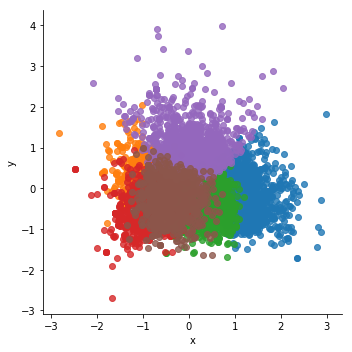

In [27]:
# Plot the label annotations with the clustering algorithms.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
corpus_embeddings_reduced_data = PCA(n_components=2).fit_transform(corpus_embeddings_data)

# Or using much slower TSNE:
#from sklearn.manifold import TSNE
#corpus_embeddings_reduced_data = TSNE(n_components=2).fit_transform(corpus_embeddings_data)

cluster_result = pd.DataFrame(data=np.vstack((corpus_embeddings_reduced_data[:,0], corpus_embeddings_reduced_data[:,1], document_cluster_labels)).T,
                              columns = ['x', 'y', 'cluster_label'])

sns.lmplot( x="x", y="y", data=cluster_result, fit_reg=False, hue='cluster_label', legend=False)
plt.show()

In [28]:
import sklearn.cluster as cluster
clustering_algorithms = [[cluster.KMeans, (), {'n_clusters':42}],
                         [cluster.AffinityPropagation, (),
                            {'preference':-5.0, 'damping':0.95}],
                         [cluster.MeanShift, (0.175,), {'cluster_all':False}],
                         [cluster.SpectralClustering, (), {'n_clusters':42}],
                         [cluster.AgglomerativeClustering, (),
                            {'n_clusters':42, 'linkage':'ward'}],
                         [cluster.DBSCAN, (), {'eps':0.025}]]
for algorithm, arguments, parameters in clustering_algorithms:
  labels = algorithm(arguments, parameters).fit_predict(corpus_embeddings_data)


TypeError: ignored

Note: To scale clustering to Google sizes of datasets, you likely need to use libraries from [Graph Mining](http://go/graph-mining) team.

## Topic modeling

There are two major paradigm of thinking about your data: discriminative or generative.

Topic modeling usually falls into the family of generative methods.
<br>
In particular let's consider one of the most prominent methods: Latent Dirichlet Allocation (LDA).

LDA is a way to automatically discover topics that set of documents convey.

LDA represent documents as mixtures of topics, and each topic somehow generates words with certain probability.
<br>Since we talk about generative models when writing a document:
* we need to decide on the number of words N the document will have (this could be some distribution, e.g., Poisson distribution);
* further, we need to choose a topic mixture for the document (here we can
<br>use [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution
) over a fixed number of chosen topics K).
<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Dirichlet_example.png" width="40%">
* now we need to generate each words for each document:
  * we pick a topic (according to the Dirichlet distribution that we have sampled for the topics)
  * using picked topics, we generate words (according to the topic's multinomial distribution)
  
Assuming such generative process, LDA simply tried to backtrack from the data and find the set of topics that are
<br>likely to have generated the documents corpus.

To learn the topic representation of each document and the words associated to each topic:

* we go over the documents and assign randomly each word in the topic to one of the K topics
<br>(this already gives us both topic and word distribution - though not a good one)
* for each document and each word in the document
  * for each topic t, we compute (1) $p (topic_k | document_n)$ - the portion of words in document $n$ that are currently assigned to the topic $k$;
  <br>(2) $ p(word_i | topic_k) $ - portion of assignments to topic $k$ over all documents that come from this word $i$.
  <br>We reassign word $i$ to a new topic, where we choose a topic with probability $ p(topic_k | document_n) \cdot p(word_n | topic_k)$ -
  <br>the probability that topic $k$ generated word $i$.
  <br>
  So the assumption with this step, is that all the assignments are correct as they are now,
  <br>but this one - so we update the words' topic according to the formula above.
* After repeating the update step a large number of times, once the steady state is obtained - stop.
<br>So this would allow us to measure the topic mixture for each document and word's association to the topic overall.

Some LDA implementations:
* [pypi LDA](https://pypi.org/project/lda/)
* [gensim](https://pypi.org/project/gensim/)
* [sklearn LDA](http://scikit-learn.org/dev/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

Now let's prepare the input for the chosen implementation (sklearn).
Input is the vectorized representations of the input strings,
<br>e.g., BOW word frequencies.

In [0]:
#@title Load data
#    So we have our corpus called corpus:) - corpus and its term frequency
#      representation in here document_term_matrix.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

corpus = []
positive_corpus = []
negative_corpus = []
for document_id, row in clean_confident_entries.iterrows():
  corpus.append(" ".join(row['text_tokenized_cleaned']))
  if row['choose_one'] == "Relevant" or row['choose_one_gold'] == "Relevant":
    positive_corpus.append(" ".join(row['text_tokenized_cleaned']))
  if row['choose_one'] == "Not Relevant" or row['choose_one_gold'] == "Not Relevant":
    negative_corpus.append(" ".join(row['text_tokenized_cleaned']))
document_term_matrix = vectorizer.fit_transform(positive_corpus).toarray()
document_term_matrix_feature_name = vectorizer.get_feature_names()

Let's apply LDA topic extraction over different samples of our dataset.

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

lda_all = LatentDirichletAllocation(n_components=10,
                                    max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)\
      .fit(document_term_matrix)

Let's now see the topics that we have extracted on our data.

In [35]:
#    Inspired by https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print ("\nTopics for all document")
display_topics(lda_all,
               document_term_matrix_feature_name, no_top_words)


Topics for all document
Topic 0:
suicide pm wreckage confirmed malaysia severe from saudi mosque bomber
Topic 1:
the hiroshima bomb old nuclear suicide detonated pkk japan atomic
Topic 2:
now transport fedex israel will wake longer lab anthrax bioterror
Topic 3:
via man israeli news national attacked mount temple muslims flag
Topic 4:
storm train amp car terrorist calgary survivors mass derailment rt
Topic 5:
fires california wild heat drought wave caught evacuate bush northern
Topic 6:
massacre nws august volcano weather aug issues issued hawaii action
Topic 7:
fire disaster the police wildfire news more northern california obama
Topic 8:
two people this families get airport floods watch in under
Topic 9:
legionnaires earthquake outbreak oil spill new may sue three projected


Note: Detected topics can be also used as features for document classification. Sort of dimentionaly reduction.

## ***Exercise*** : Explore positive and negative topics

Now please train the model only on positive and negative examples. Which topics do you see?